# Pymaceuticals Inc.
---

### Analysis

- Capomulin is one of the two Drug Regimen tested that have consistent effect in reducing the tumor volume of the mice (the other is Ramicane). Based on the standard deviation value of the data on tumor volume (and the fact that there is no outlier in the data for Capomulin), we can conclude that effect of Capomulin on the mice is consistent.

- Majority of mice in the test who are treated with Capomulin have their tumor volume reduced. With the mean volume of 40.7mm3 at the last timepoint, Capomulin is nearly as effective as Ramicane in reducing the size of tumor.

- The correlation between mouse weight and the average tumor volume is high (r-value = 0.84). The the heavier the mouse is, the larger the tumor it has.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_data = pd.DataFrame.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")
combined_mouse_data = combined_mouse_data.dropna()

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_mouse_data["Mouse ID"].nunique()

249

In [3]:
# Group data by "Mouse ID" and "Timepoint"
duplicate_check_df = combined_mouse_data.groupby(["Mouse ID", "Timepoint"])

# Check the number of times each "Mouse ID - Timepoint" combination appeared in the dataframe
size = duplicate_check_df.size().reset_index()

# Narrow down to the combinations that appear more than once
size = size[size[0] > 1]
size["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_mouse_data.loc[(combined_mouse_data["Mouse ID"] == "g989")]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = combined_mouse_data.loc[(combined_mouse_data["Mouse ID"] != "g989")]
cleaned_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
print(cleaned_mouse_data["Mouse ID"].nunique())

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# calculate mean, median, variance, standard deviation, SEM

grouped_mouse_data = cleaned_mouse_data.groupby(["Drug Regimen"])

tv_mean = grouped_mouse_data["Tumor Volume (mm3)"].mean()
tv_median = grouped_mouse_data["Tumor Volume (mm3)"].median()
tv_variance = grouped_mouse_data["Tumor Volume (mm3)"].var()
tv_standard_dev = grouped_mouse_data["Tumor Volume (mm3)"].std()
tv_SEM = grouped_mouse_data["Tumor Volume (mm3)"].sem()

# set dataframe using dictionary

tv_data = {
    "Mean Tumor Volume": tv_mean,
    "Median Tumor Volume": tv_median,
    "Tumor Volume Variance": tv_variance,
    "Tumor Volume Std. Dev.": tv_standard_dev,
    "Tumor Volume Std. Err.": tv_SEM
}
tv_dataframe = pd.DataFrame(tv_data)
tv_dataframe

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_mouse_data.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

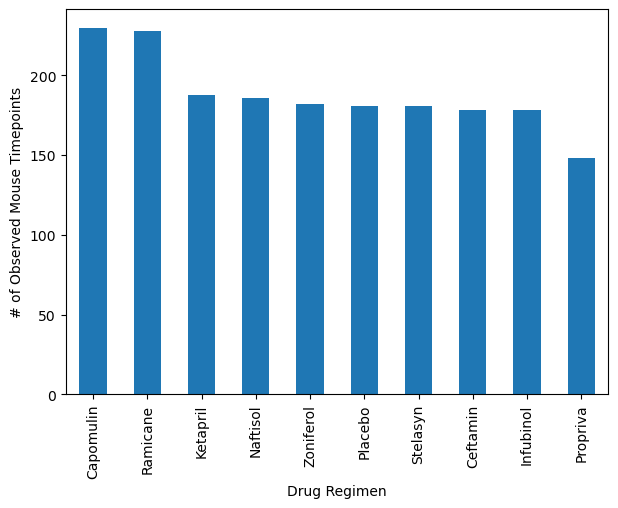

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_data = grouped_mouse_data["Timepoint"].count().sort_values(ascending = False)
bar_chart1 = bar_chart_data.plot(kind = "bar", figsize = (7,5))
bar_chart1.set_xlabel("Drug Regimen")
bar_chart1.set_ylabel("# of Observed Mouse Timepoints")
bar_chart1

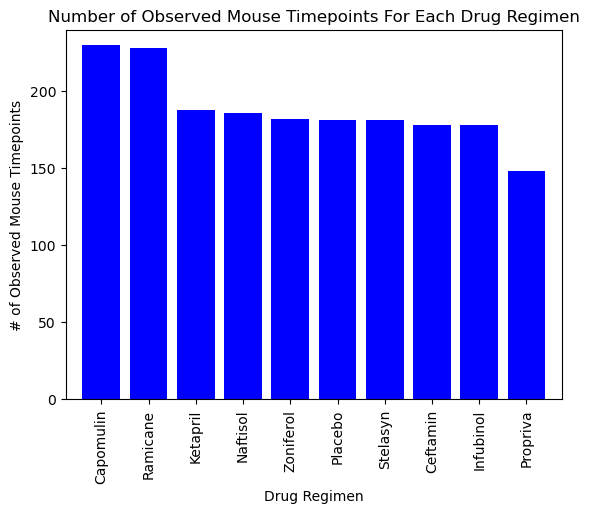

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
num_observed_timepoints = bar_chart_data
drug_regimen = list(bar_chart_data.keys())
x_axis = np.arange(0, len(drug_regimen))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Number of Observed Mouse Timepoints For Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.xlim(-0.75, len(drug_regimen) - .25)
plt.ylim(0, max(num_observed_timepoints) + 10)

plt.bar(x_axis, num_observed_timepoints, facecolor = "blue", align = "center")
plt.xticks(tick_locations, drug_regimen, rotation = 90)
plt.show()

Text(0, 0.5, 'Sex')

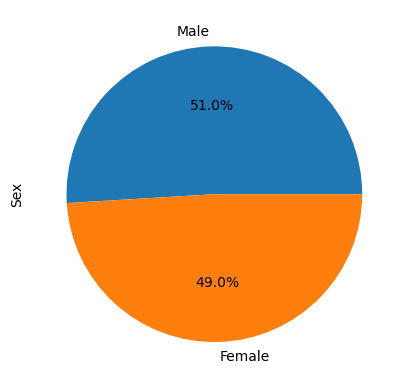

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_data = cleaned_mouse_data["Sex"].value_counts().sort_values(ascending = False)
pie_chart1 = mouse_sex_data.plot(kind = "pie",autopct = "%1.1f%%")
pie_chart1.set_ylabel("Sex")

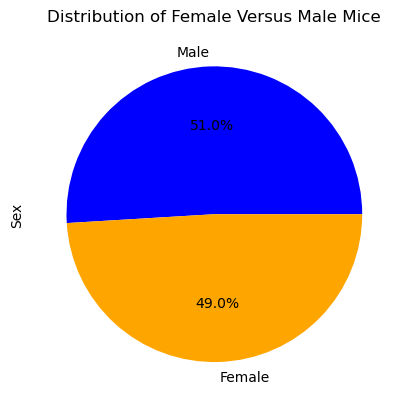

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colours = ["blue", "orange"]
labels = list(mouse_sex_data.keys())
plt.title("Distribution of Female Versus Male Mice")
plt.pie(mouse_sex_data, autopct = "%1.1f%%", colors = colours, labels = labels)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lasttimepoint = cleaned_mouse_data.groupby("Mouse ID")["Timepoint"].max()
lasttimepoint_df = pd.DataFrame(lasttimepoint)
lasttimepoint_df = lasttimepoint_df.rename(columns = {"Timepoint": "Last Timepoint"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse_data = cleaned_mouse_data.copy()
merged_mouse_data = pd.merge(merged_mouse_data,lasttimepoint_df, how = "inner", on = "Mouse ID")
last_timepoint_only_df = merged_mouse_data.loc[(merged_mouse_data["Timepoint"] == merged_mouse_data["Last Timepoint"]), :]


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

for i in range(len(treatments)):
    tumor_volumes.append(last_timepoint_only_df.loc[(last_timepoint_only_df["Drug Regimen"] == treatments[i]),"Tumor Volume (mm3)"])

    quartiles = tumor_volumes[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = []
    for j in tumor_volumes[i]:
        if (j < lower_bound) or (j > upper_bound):
            outliers.append(j)
    print(f"{treatments[i]}'s outliers: {outliers}")

Capomulin's outliers: []
Ramicane's outliers: []
Infubinol's outliers: [36.3213458]
Ceftamin's outliers: []


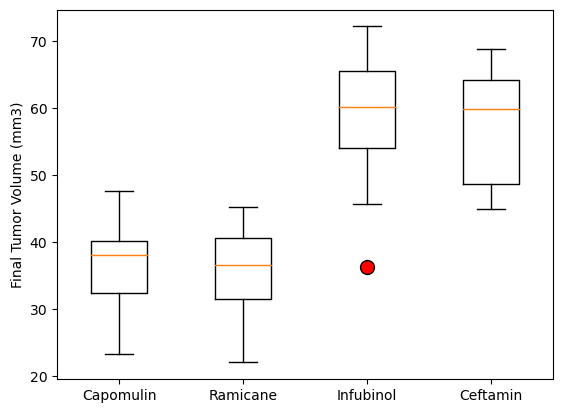

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volumes, labels = treatments, flierprops = dict(markersize = 10, markerfacecolor = "red"))
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

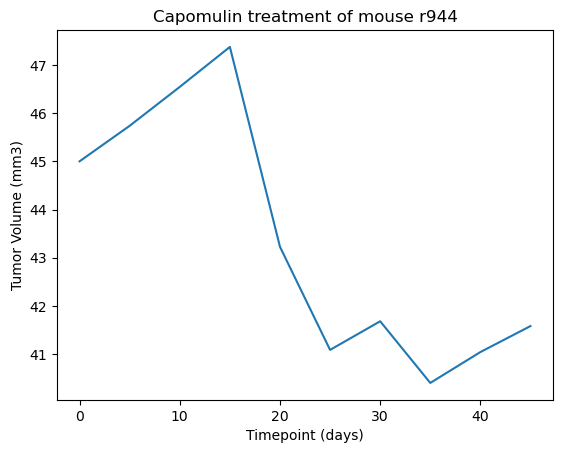

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin (random mouse)

#Capomulin is the chosen drug
chosen_drug = treatments[0]
chosen_drug_df = cleaned_mouse_data.loc[(cleaned_mouse_data["Drug Regimen"] == chosen_drug), :]

# randomly select a mouse
random_mouse = chosen_drug_df["Mouse ID"].sample()
random_mouse = pd.DataFrame(random_mouse)
random_mouse = random_mouse.iloc[0,0]

one_mouse_df = chosen_drug_df.loc[(chosen_drug_df["Mouse ID"] == random_mouse), :]

# set x_axis and y_axis
x_axis = one_mouse_df["Timepoint"]
y_axis = one_mouse_df["Tumor Volume (mm3)"]

# generate line plot

plt.plot(x_axis, y_axis)
plt.title(f"Capomulin treatment of mouse {random_mouse}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

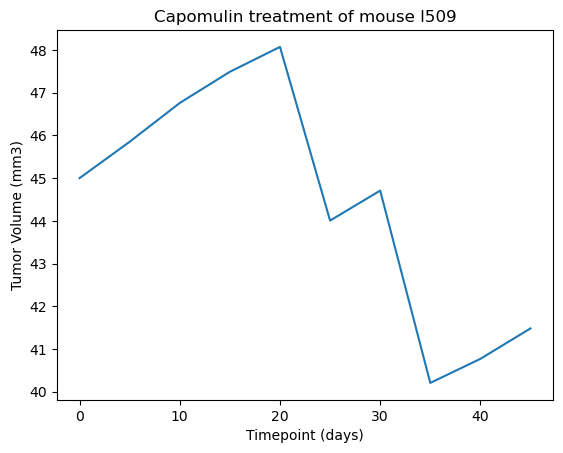

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin (chosen mouse = "l509")

chosen_mouse = "l509"

one_mouse_df = chosen_drug_df.loc[(chosen_drug_df["Mouse ID"] == chosen_mouse), :]

# set x_axis and y_axis
x_axis = one_mouse_df["Timepoint"]
y_axis = one_mouse_df["Tumor Volume (mm3)"]

# generate line plot

plt.plot(x_axis, y_axis)
plt.title(f"Capomulin treatment of mouse {chosen_mouse}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

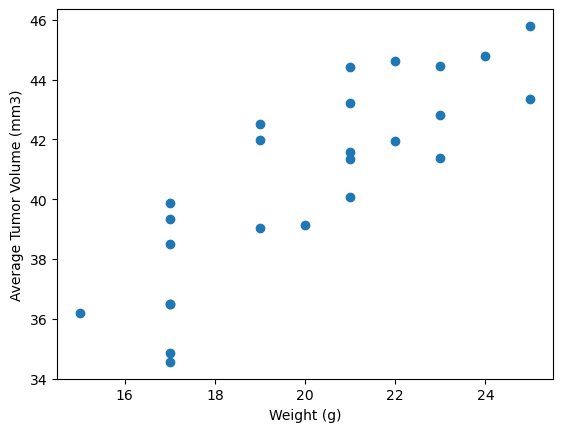

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume of each mouse. The returned data is sorted by "Mouse ID" by default
chosen_drug_df = chosen_drug_df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Weight (g)"]]
mouseid_volume = chosen_drug_df[["Mouse ID", "Tumor Volume (mm3)"]]
mouseid_volume = pd.DataFrame(mouseid_volume.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())

# Find out the weight of each mouse. Data sorted by "Mouse ID" to make it consistent with the data for tumor volume
mouseid_weight = chosen_drug_df[["Mouse ID", "Weight (g)"]]
mouseid_weight = mouseid_weight.drop_duplicates().sort_values(by = "Mouse ID")

# Merge into one dataframe
mouseid_volume_weight = pd.merge(mouseid_volume, mouseid_weight, how = "inner", on = "Mouse ID")
mouseid_volume_weight

# Generate a scatter plot
x_axis = mouseid_volume_weight["Weight (g)"]
y_axis = mouseid_volume_weight["Tumor Volume (mm3)"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


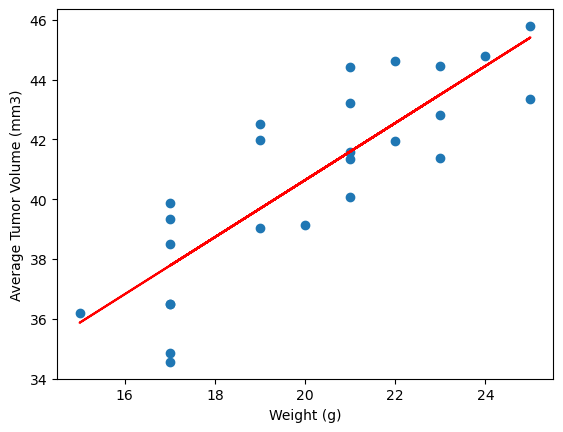

The r-squared is: 0.7088568047708723


In [18]:
# Calculate the correlation coefficient and a linear regression model
# For mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate and display the correlation
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


# Use lingress to obtain information required for a linear regression model.

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate the scatter plot.
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values, color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
print(f"The r-squared is: {rvalue ** 2}")